In [1]:
import datetime as dt
import numpy as np
import pickle
import gdal

import datetime as dt

from plot_kafka_retrieval_utils import extract_pixel, plot_pixel_tseries

import matplotlib.pylab as plt
%matplotlib inline

In [34]:
def get_pixel(filepath, year, x, y):
    """
    Get retrieved parameters and uncertainties for a single pixel
    This will open the data from a pickle file if it exists, otherwise
    it calls extract_pixel, which will get the data and also store a pickle file
    for next time.
    """
    file = filepath+"/pixel_{}_{}.pkl".format(x,y)
    try:
        data, uncs, dates = pickle.load(open(file, 'rb'))
    except FileNotFoundError:
        data, uncs, dates = extract_pixel(filepath, year, x,y, params=None, outfile=file)
    return data, uncs, dates

## Plot a single parameter and uncertainty

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


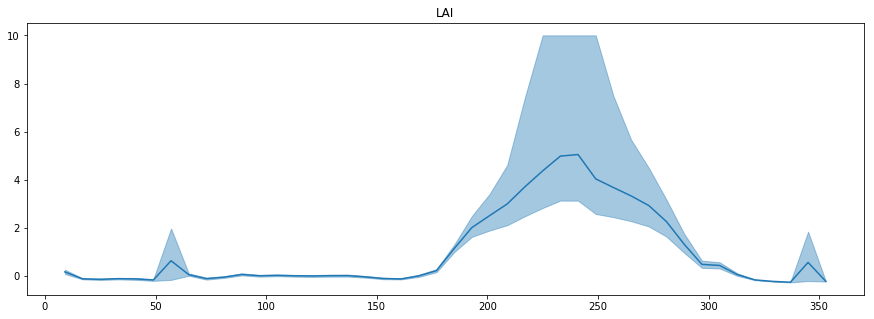

In [35]:
file = "/home/npounder/output/kafka/28Mar/kafkaout_prop_LAI_Q0-25/"
param = "TeLAI"
x = 698; y= 1230
fig, ax = plt.subplots(1,1, figsize=(15,5))
data, uncs, dates = get_pixel(file, 2017, x,y)
plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)

In [36]:
def plot_all_params(axs, params, filepaths, year, x, y, legend = None):
    """loop through different retrieval direcories and plot all parameters"""
    for ax, param in zip(axs, params):
        title = "{}".format(param)
        if param == "LAI":
            param = "TeLAI"
            convertLAI = True
        else:
            convertLAI = False
        for f in filepaths:
            data, uncs, dates = get_pixel(f, year, x,y)
            plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                               marker='-', convertLAI=convertLAI)
        #ax.set_title(title)
        if legend !=None:
            ax.legend(legend)
    return axs

In [37]:
# These [parameters may be used for any broadband SAIL retrieval]
params=["LAI","TeLAI", "w_nir", "x_nir", "a_nir",
        "w_vis", "x_vis", "a_vis"]

## Rice, Spain

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:164: RuntimeWarning: invalid value encountered in log
  data = -2*np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:166: RuntimeWarning: invalid value encountered in log
  u_unc = -2.*np.log(u_unc)


saving output to /home/npounder/output/kafka/seperatePropagation/kafkaout_Arros_newprop_0-1//pixel_670_1240.pkl
TeLAI_A2017009.tif
TeLAI_A2017017.tif
TeLAI_A2017025.tif
TeLAI_A2017033.tif
TeLAI_A2017041.tif
TeLAI_A2017049.tif
TeLAI_A2017057.tif
TeLAI_A2017065.tif
TeLAI_A2017073.tif
TeLAI_A2017081.tif
TeLAI_A2017089.tif
TeLAI_A2017097.tif
TeLAI_A2017105.tif
TeLAI_A2017113.tif
TeLAI_A2017121.tif
TeLAI_A2017129.tif
TeLAI_A2017137.tif
TeLAI_A2017145.tif
TeLAI_A2017153.tif
TeLAI_A2017161.tif
TeLAI_A2017169.tif
TeLAI_A2017177.tif
TeLAI_A2017185.tif
TeLAI_A2017193.tif
TeLAI_A2017201.tif
TeLAI_A2017209.tif
TeLAI_A2017217.tif
TeLAI_A2017225.tif
TeLAI_A2017233.tif
TeLAI_A2017241.tif
TeLAI_A2017249.tif
TeLAI_A2017257.tif
TeLAI_A2017265.tif
TeLAI_A2017273.tif
TeLAI_A2017281.tif
TeLAI_A2017289.tif
TeLAI_A2017297.tif
TeLAI_A2017305.tif
TeLAI_A2017313.tif
TeLAI_A2017321.tif
TeLAI_A2017329.tif
TeLAI_A2017337.tif
TeLAI_A2017345.tif
TeLAI_A2017353.tif
TeLAI_A2017361.tif
saving output to /home/npounder/o

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6c7e377b8>,
      dtype=object)

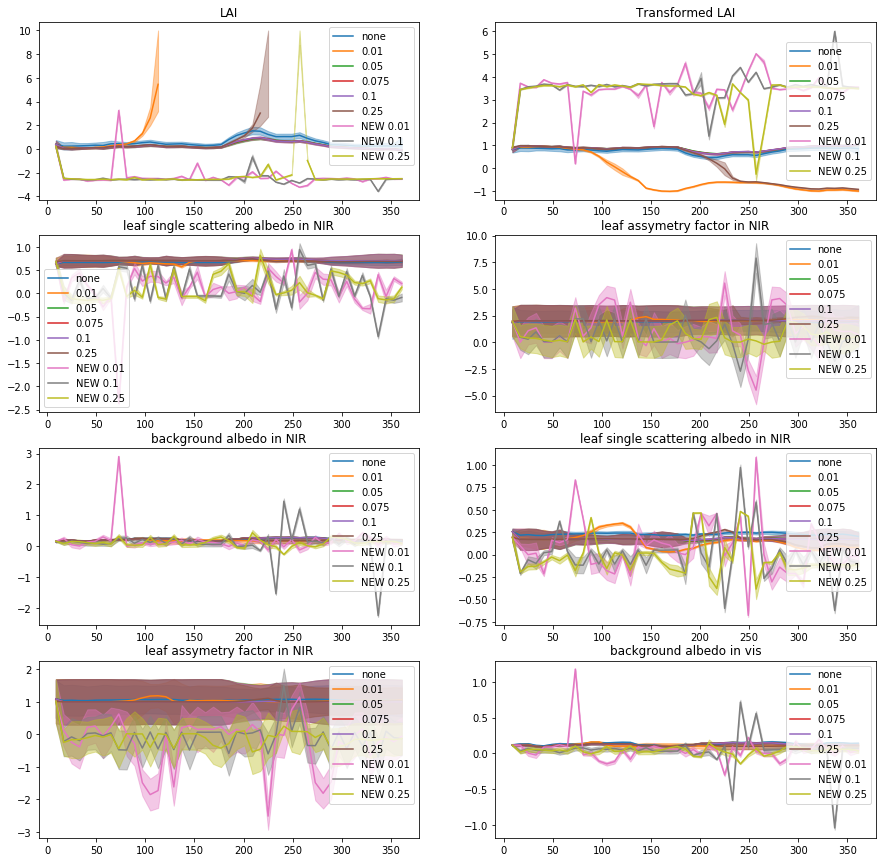

In [41]:
filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_no_prop_HessCorr/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-01/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-05/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-075/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-1/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-25/",
             "/home/npounder/output/kafka/seperatePropagation/kafkaout_Arros_newprop_0-01/",
             "/home/npounder/output/kafka/seperatePropagation/kafkaout_Arros_newprop_0-1/",
             "/home/npounder/output/kafka/seperatePropagation/kafkaout_Arros_newprop_0-25/"]
legend = ("none","0.01", "0.05", "0.075", "0.1", "0.25", "NEW 0.01", "NEW 0.1", "NEW 0.25")
x = 698; y= 1230
x = 670; y= 1240

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2017, x, y, legend = legend)

In [7]:
## Alcornocales, Forest

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:164: RuntimeWarning: invalid value encountered in log
  data = -2*np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:166: RuntimeWarning: invalid value encountered in log
  u_unc = -2.*np.log(u_unc)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d08b6dd8>,
      dtype=object)

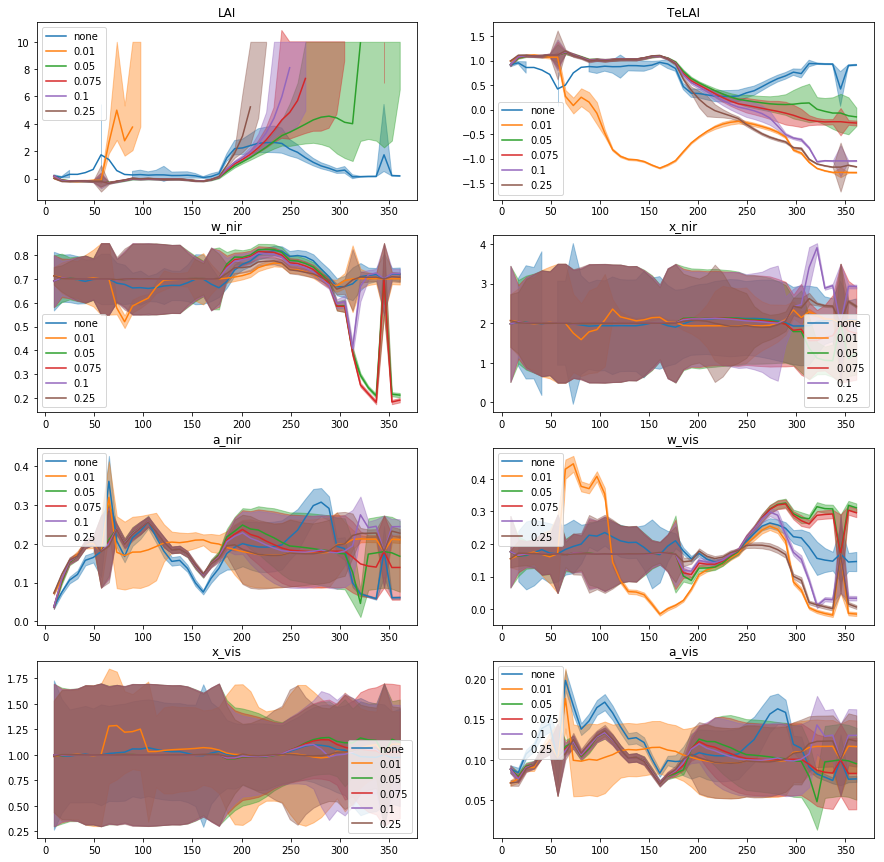

In [8]:
filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_no_prop_HessCorr/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-01/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-05/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-075/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-1/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-25/"]
legend = ("none","0.01", "0.05", "0.075", "0.1", "0.25")
x = 698; y= 1230

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2017, x, y, legend = legend)

## Bondville, wheat

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:164: RuntimeWarning: invalid value encountered in log
  data = -2*np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:166: RuntimeWarning: invalid value encountered in log
  u_unc = -2.*np.log(u_unc)


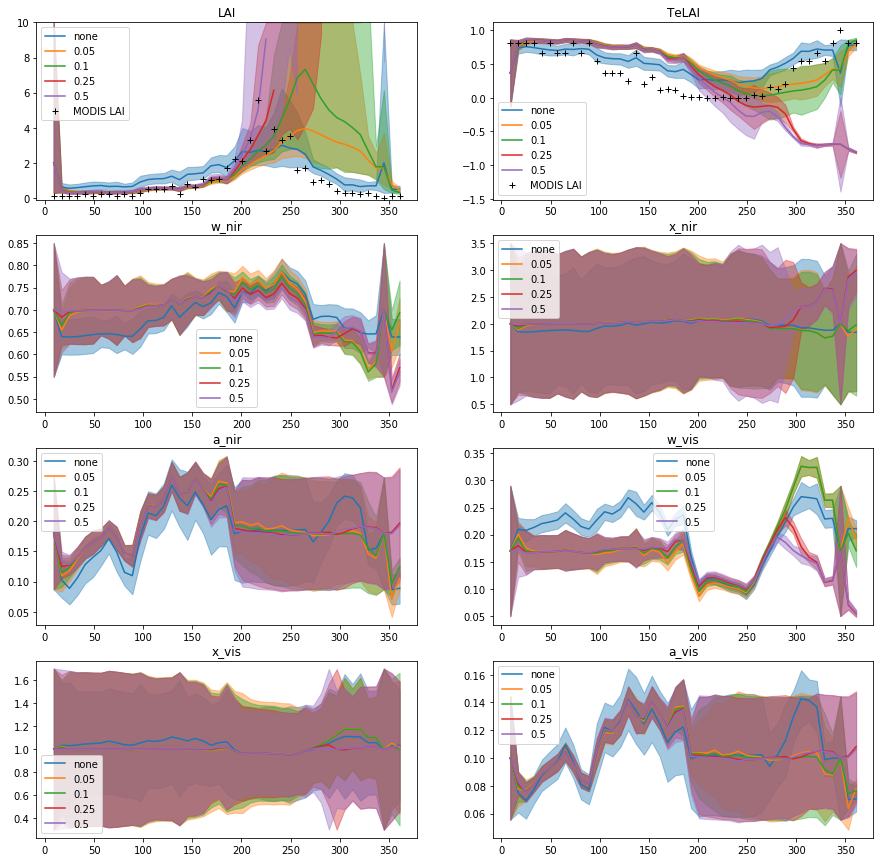

In [12]:

filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-05/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-1/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-25/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-5/"]
modisname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'


legend = ("none", "0.05", "0.1", "0.25", "0.5")
line = 2298; row = 569

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2006, line, row, legend)

#Add MODIS LAI
vrt_d = gdal.Open(modisname)
mcd15 = vrt_d.ReadAsArray(row, line, 1, 1 )*0.1
axs[0].plot(np.arange(9,366,8), mcd15[:-1,0,0], 'k+')
legend = ("none", "0.05", "0.1", "0.25", "0.5", 'MODIS LAI')
axs[0].legend(legend)
axs[0].set_ylim([-0.1, 10.0])

axs[1].plot(np.arange(9,366,8), np.exp(-2*mcd15[:-1,0,0]), 'k+')
legend = ("none", "0.05", "0.1", "0.25", "0.5", 'MODIS LAI')
axs[1].legend(legend)



## Bondville with prior LAI
For AR meeting

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:165: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


Text(0.5,1,'Bondville, wheat')

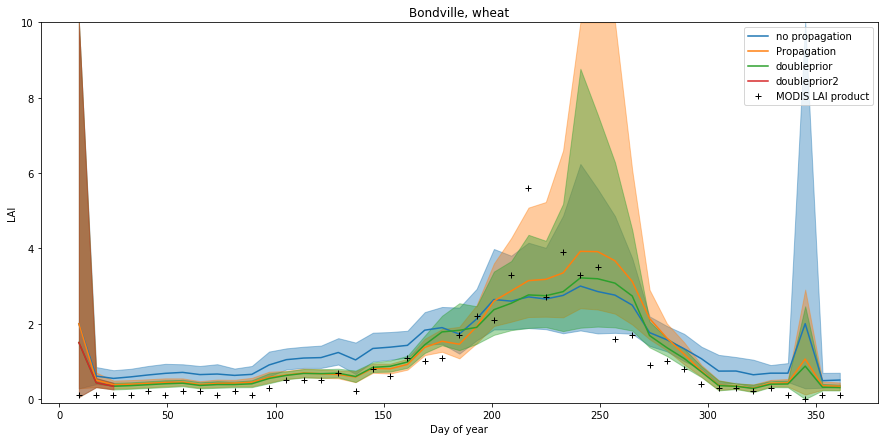

In [32]:
filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-25/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_DblPrior_0-25",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_DblPrior_take2_0-25/"]#,
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-5/",
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-75/"]
modisname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'

params = ["LAI"]
legend = ("no propagation", "Propagation","doubleprior","doubleprior2")
line = 2298; row = 569

#fig, axs = plt.subplots(4,2, figsize=(15,15))
#axs = axs.flatten()
fig, axs = plt.subplots(1,1, figsize=(15,7))
axs = [axs]
plot_all_params(axs, params, filepaths, 2006, line, row, legend)

#Add MODIS LAI
vrt_d = gdal.Open(modisname)
mcd15 = vrt_d.ReadAsArray(row, line, 1, 1 )*0.1
axs[0].plot(np.arange(9,366,8), mcd15[:-1,0,0], 'k+')
legend = legend + ("MODIS LAI product",)
axs[0].legend(legend)
axs[0].set_ylim([-0.1, 10.0])
axs[0].set_xlabel("Day of year")
axs[0].set_ylabel("LAI")
axs[0].set_title("Bondville, wheat")
#axs[1].plot(np.arange(9,366,8), np.exp(-2*mcd15[:-1,0,0]), 'k+')
#legend = ("none", "0.25", "0.5", "0.75", 'MODIS LAI')
#axs[1].legend(legend)


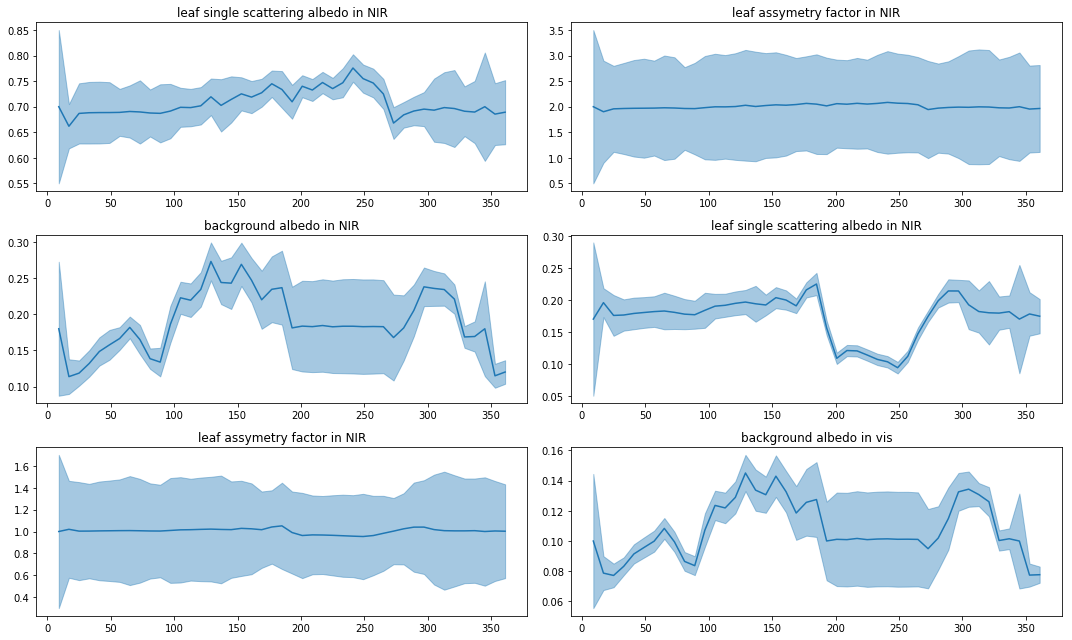

In [23]:
filepaths = [#"/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-25/"]#,
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-5/",
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-75/"]
modisname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'

params=["w_nir", "x_nir", "a_nir",
        "w_vis", "x_vis", "a_vis"]
#legend = ("no propagation", "Propagation",)
line = 2298; row = 569

fig, axs = plt.subplots(3,2, figsize=(15,9))
axs = axs.flatten()
#fig, axs = plt.subplots(1,1, figsize=(15,7))
#axs = [axs]
plot_all_params(axs, params, filepaths, 2006, line, row, None)


fig.tight_layout()

In [24]:
import gdal

line = 2298; row = 569
fname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'
vrt_d = gdal.Open( fname )
mcd15 = vrt_d.ReadAsArray( row, line, 1, 1 )


Text(0.5,3.2,'Day of year')

In [11]:
mcd15[:,0,0]


array([ 1,  1,  1,  1,  2,  1,  2,  2,  1,  2,  1,  3,  5,  5,  5,  7,  2,
        8,  6, 11, 10, 11, 17, 22, 21, 33, 56, 27, 39, 33, 35, 16, 17,  9,
       10,  8,  4,  3,  3,  2,  3,  1,  0,  1,  1,  1], dtype=uint8)